In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim

import tensorflow.examples.tutorials.mnist.input_data as input_data
tf.set_random_seed(2019)
mnist = input_data.read_data_sets("../MNIST_data", one_hot=True, reshape=False)
train_set = mnist.train
test_set = mnist.test

#train_imgs, train_labels = train_set.next_batch(64)
#print(train_imgs[0].shape)
#print(train_labels.shape)

def build_lstm(num_units, num_layers, batch_size, keep_prob =1):
    def build_cell(num_units):
        cell = tf.nn.rnn_cell.LSTMCell(num_units, reuse=tf.AUTO_REUSE)
        cell = tf.nn.rnn_cell.DropoutWrapper(cell, output_keep_prob=keep_prob)
        return cell
    cell = tf.nn.rnn_cell.MultiRNNCell([build_cell(num_units) for _ in range(num_layers)])
    init_state = cell.zero_state(batch_size, tf.float32)
    
    return cell, init_state
def lstm(x, num_units, num_layers, batch_size, keep_prob =1):
    lstm_cell, lstm_init_state = build_lstm(num_units, num_layers, batch_size)
    lstm, final_state = tf.nn.dynamic_rnn(lstm_cell, x, initial_state=lstm_init_state, time_major=True)
    return lstm, final_state

input_ph = tf.placeholder(shape=(None,28,28,1), dtype=tf.float32)
label_ph = tf.placeholder(shape=(None, 10), dtype=tf.int64)
batch_size_ph = tf.placeholder(tf.int32, [])
keep_prob_ph = tf.placeholder(tf.float32, [])
inputs = tf.transpose(tf.squeeze(input_ph, axis=[-1]), (1,0,2))

#一维是时间步长， 二维是batch size, 三维是特征个数
#[max_time, batch_size, depth]`.
print(inputs.shape)
def rnn_classify(inputs, rnn_units = 100, rnn_layers = 2, batch_size = 64, keep_prob=1, num_classes = 10):
    rnn_out, rnn_state = lstm(inputs, rnn_units, rnn_layers, batch_size, keep_prob=keep_prob)
    net = rnn_out[-1]
    net = slim.flatten(net)
    net = slim.fully_connected(net , num_classes, activation_fn=None, scope='classification')
    return net

out = rnn_classify(inputs, batch_size=batch_size_ph, keep_prob=keep_prob_ph)

loss = tf.losses.softmax_cross_entropy(logits=out, onehot_labels=label_ph)
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(out, axis=-1),tf.argmax(label_ph, axis=-1)), 
                              dtype=tf.float32))

lr = 0.01
optimizer = tf.train.MomentumOptimizer(lr, 0.9)
train_op = optimizer.minimize(loss)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for e in range(5000):
    images, labels = train_set.next_batch(64)
    sess.run(train_op, feed_dict={input_ph: images, label_ph: labels, batch_size_ph: 64, keep_prob_ph: 0.5})
    if e %500 ==0:
        test_images, test_labels = test_set.next_batch(128)
        loss_train, acc_train = sess.run([loss,acc], feed_dict={input_ph: images, label_ph: labels, 
                                                              batch_size_ph: 64, keep_prob_ph: 0.5})
        loss_test, acc_test = sess.run([loss,acc], feed_dict={input_ph: test_images, label_ph: test_labels, 
                                                              batch_size_ph: 128, keep_prob_ph: 0.5})
        print('Step {}: train_loss: {:.6f} train_acc: {:.6f} test_loss:{:.6f} test_acc: {:.6f}'.format(e+1,loss_train, acc_train, loss_test, acc_test))
print("Train done !!")  
print("-"*40)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(28, ?, 28)
Step 1: train_loss: 2.311135 train_acc: 0.109375 test_loss:2.294906 test_acc: 0.078125
Step 501: train_loss: 0.485433 train_acc: 0.859375 test_loss:0.329423 test_acc: 0.882812
Step 1001: train_loss: 0.171368 train_acc: 0.953125 test_loss:0.242567 test_acc: 0.906250
Step 1501: 

In [2]:
?tf.transpose

In [3]:
train_imgs, train_labels = train_set.next_batch(64)
print(train_imgs[0].shape)
print(train_labels.shape)

(28, 28, 1)
(64, 10)


In [23]:
inputs.shape

TensorShape([Dimension(28), Dimension(None), Dimension(28)])

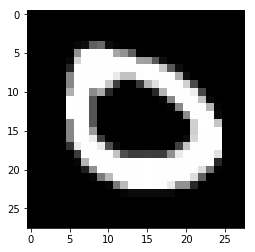

In [22]:
import matplotlib.pyplot as plt

plt.imshow(train_imgs[2].reshape([28,28]),cmap=plt.cm.gray)

In [24]:
?tf.nn.dynamic_rnn